In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np


In [10]:
class Tree:
    
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

        self.pos = None
        self.edges =  None
        self.colors = None
        self.weights = None
        self.node_colors = []

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#e6f2f2"
    GOLD = "#fcc200"
    PURPLE = "#f9e6ec"

    colors = [TEAL, GOLD, PURPLE]
    
    columns = []

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = [] 
        self.label = label
        #self.col = 0
        self.row = 0

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)
        self.tree.genColCluster()

    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1


    

    





# class DataFrameGenerator:
#     @staticmethod
#     def generateGraphData(node : Node, horizontal_flip = False, predecessor_successor_array = []) -> list:
#         successors = node.successors[::-1] if horizontal_flip else node.successors
#         for successor in successors:
#             predecessor_successor_array.append([node.label, successor.label])
#             DataFrameGenerator.generateGraphData(successor, horizontal_flip, predecessor_successor_array)
#         return predecessor_successor_array

#     @staticmethod
#     def generateDataFrame(node : Node, horizontal_flip = False) -> pd.DataFrame: 
#         columns = ['predecessorId', 'successorId']
#         df = pd.DataFrame(columns = columns, data=DataFrameGenerator.generateGraphData(node, horizontal_flip, []))
#         df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
#         df[['predecessorId', 'successorId']] = df[['predecessorId', 'successorId']].astype('int')
#         return df


In [11]:
#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height
        
        self.columns = []
        self.predecessor_con = []
        self.successor_con = []
        self.connection_id = 0
        self.movement_con = []

        super().__init__(root)   


    def generate(self, node: Node):
        mid_in_range = True
        left_in_range = True
        right_in_range = True

        label = node.label
        h = self.height - 1
        b_leaf = 1
        for i in range(1,h+1):
            b_leaf = int(b_leaf * 2 + 1) 

        if (node.label * 4 + 1) > (b_leaf):
            mid_in_range = False
        else:
            mid_in_range = True

        if (node.label * 2 + 1) > (b_leaf):
            right_in_range = False
        else:
            right_in_range = True

        if (node.label * 2 - 1) > (b_leaf):
            left_in_range = False
        else:
            left_in_range = True

        if node.label == 1:         
            right_child =  Node(node.label * 2 + 1)      
            node.addSuccessor(right_child)          
            self.generate(right_child)      
            self.predecessor_con.append(int(1))
            self.successor_con.append(int(3)) 
            self.predecessor_con.append(int(1))
            self.successor_con.append(int(5)) 
            self.connection_id = self.connection_id + 2
        else:          
            if mid_in_range == True:
                middle_child = Node(node.label * 4 + 1)          
            if right_in_range == True:
                right_child = Node(node.label * 2 + 1)
            if left_in_range == True:
                left_child = Node(node.label * 2 - 1)

            if right_in_range == True:
                node.addSuccessor(right_child)
            if mid_in_range == True:
                node.addSuccessor(middle_child)
            if left_in_range == True:
                node.addSuccessor(left_child)

            if right_in_range == True:
                self.generate(right_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(right_child.label)
                self.connection_id = self.connection_id + 1
            if mid_in_range == True:
                self.generate(middle_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(middle_child.label)
                self.connection_id = self.connection_id + 1
            if left_in_range == True:
                self.generate(left_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(left_child.label)
                self.connection_id = self.connection_id + 1

        
    def genColCluster(self):       
        aberkane_height = self.height-1
        col_arr = []
        big_leaf = int(1)
        used_nodes = []
        col_position = 0
        is_right = False
        is_left = False
        right_node = 0
        left_node = 0
        movement_con = []

        for i in range(1,aberkane_height+1):
            big_leaf = int(big_leaf * 2 + 1) 

        for j in range(1,big_leaf+1, 2):
            is_part = False
            col_build = []

            for x in used_nodes:
                if j == x:
                    is_part = True
            
            if is_part == False:
                used_nodes.append(int(j))
                col_build.append(int(j))

                right_node = int((j-1)/2)
                left_node = int((j+1)/2)
                    
                is_right = False
                is_left = False

                for a in used_nodes:      
                    if j == 1:
                        is_right = True
                        is_left = True
                    elif a == int(right_node):
                        is_right = True
                    elif a == int(left_node):
                        is_left = True
                            
                test_node = j*4+1
                while(test_node < big_leaf):
                    test_node_is_part = False

                    for y in used_nodes:
                        if test_node == y:
                            test_node_is_part = True
                            test_node = big_leaf+1
                    
                    if test_node_is_part == False:

                        col_build.append(int(test_node))
                        used_nodes.append(int(test_node))
                        test_node = test_node * 4 + 1

                col_position
                len_col_i = 0
                len_columns = len(col_arr)

                for i in range(0,len_columns):
                    len_col_i = len(col_arr[i])
                    for j in range(0, len_col_i):
                    
                        if col_arr[i][j] == left_node or col_arr[i][j] == right_node:
                            col_position = i 

                if is_left == True and is_right == True:
                    col_arr.append(col_build)
                    movement_con.append(left_node)
                elif is_left == True:
                    if col_position == 0:
                        col_arr.insert(col_position, col_build)
                    else:
                        col_arr.insert(col_position, col_build)
                    
                    movement_con.append(col_build[0])

                elif is_right == True:
                    col_arr.insert(col_position+1, col_build)
                    
        self.movement_con = movement_con
        self.columns = col_arr
        return

    def addVertex(self,start, G):
        big_leaf = 1

        for i in range(1,self.height):##########################
            big_leaf = int(big_leaf * 2 + 1) 
        
        cur_leaf = start
        next_leaf_mid = 1
        next_leaf_right = 1
        counter = 1
        
        #if cur_leaf < big_leaf:
        if start < big_leaf:
            while (counter < self.height+1):
                next_leaf_mid = cur_leaf * 4 + 1
                next_leaf_right = cur_leaf * 2 + 1

                if (cur_leaf < big_leaf) and next_leaf_right <= big_leaf:
                    G.add_edge(cur_leaf,next_leaf_right ,color='black',weight=5)

                    right_up = next_leaf_right*4+1
                    
                    while right_up <= big_leaf:
                        if right_up * 2 + 1 <= big_leaf:
                            self.addVertex(right_up*2+1, G)
                            
                        right_up = right_up * 4 + 1

                if (cur_leaf < big_leaf) and next_leaf_mid <= big_leaf:
                    G.add_edge(next_leaf_right,next_leaf_mid,color='black',weight=5)
                    
                    if next_leaf_mid * 2+1 <= big_leaf:
                        self.addVertex(next_leaf_mid * 2+1, G)
                    
                    mid_in_range = next_leaf_mid
                    while mid_in_range <= big_leaf:
                        if mid_in_range * 2+1 <= big_leaf:
                            self.addVertex(mid_in_range * 2+1, G)

                        mid_in_range = mid_in_range * 4 + 1

                cur_leaf = (cur_leaf * 2 + 1)*2+1
                counter = counter + 2
            

    def genGraphData(self, G):             
        for i in range(0,len(self.successor_con)):
            if self.successor_con[i] == (self.predecessor_con[i] * 2 -1):
                G.add_edge(aberkane_tree.predecessor_con[i],self.successor_con[i],color='white',weight=1)
            elif aberkane_tree.successor_con[i] == (aberkane_tree.predecessor_con[i] * 4 + 1):
                G.add_edge(aberkane_tree.predecessor_con[i],self.successor_con[i],color='black',weight=5)
            else:
                G.add_edge(aberkane_tree.predecessor_con[i],self.successor_con[i],color='black',weight=1)

        for i in self.movement_con:
            self.addVertex(i, G)

        for node in G:
            color_type = Node.getType(node)
            self.node_colors.append(Node.colors[color_type-1])

        self.edges = G.edges()
        self.colors = [G[u][v]['color'] for u,v in self.edges]
        self.weights = [G[u][v]['weight'] for u,v in self.edges]

    def generatePos(self, label_value):
        col_counter = 0
        len_col_i = 0
        len_columns = len(self.columns)
        col = 0.0
        row = 0.0

        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])

            for j in range(0, len_col_i):             
                if self.columns[i][j] == int(label_value):
                    col = float(i+1)
                    break

        if label_value == 1:
            row = -2*float(1) * 0.2
        elif label_value == 3:
            row = -1.5*float(2) * 0.2  
        else:
            for i in range(2,int(label_value)):
                if label_value > (2**(i-1)) and label_value < (2**i):
                    row = -1*float(i+1) * 0.2
                    break

        result = (col,row)

        return result

    def generatePosArr(self):
        pos1 = {}
        len_col_i = 0
        len_columns = len(self.columns)

        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])
            for j in range(0, len_col_i):
                pos1[self.columns[i][j]] = self.generatePos(self.columns[i][j])
        self.pos = pos1

        return


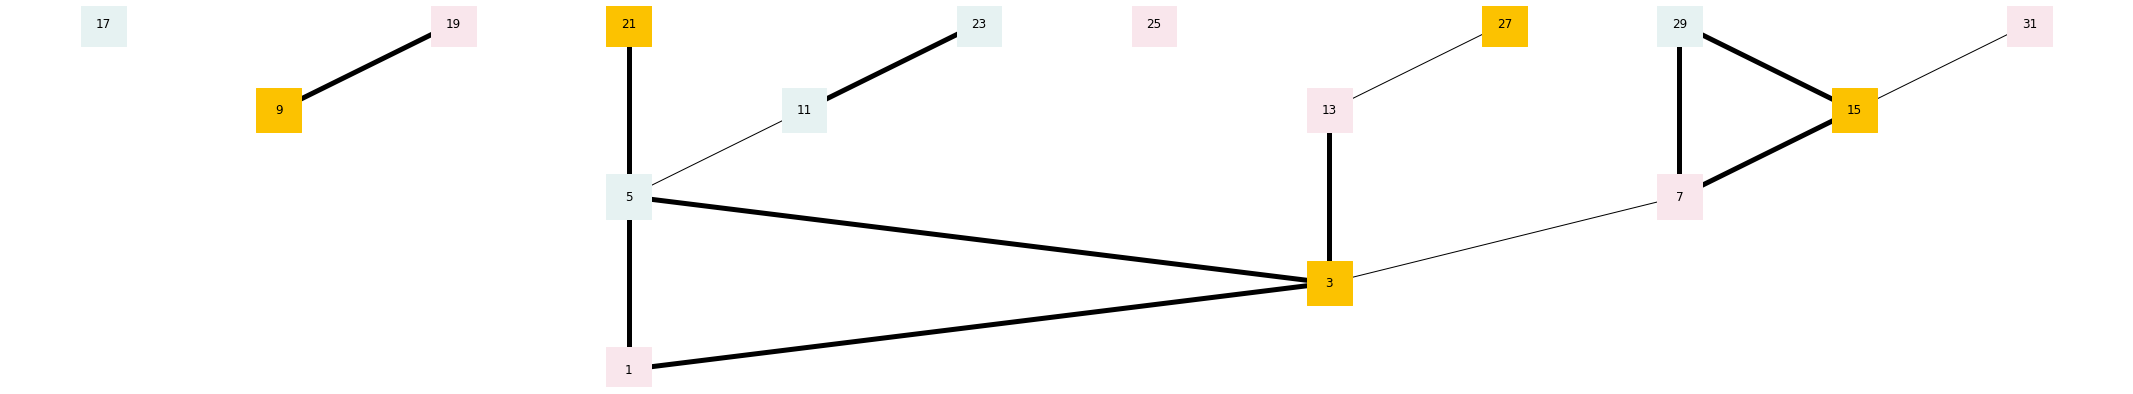

In [12]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 5) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()

aberkane_tree.genGraphData(G)

w = 5
h = 2
for i in range(1,(aberkane_tree.height+1)):
    w = w*1.5
    h = h+1

plt.figure(figsize=(w, h))

plt.gca().invert_yaxis()
#nx.draw(G, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=10)
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights, node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1 ) 


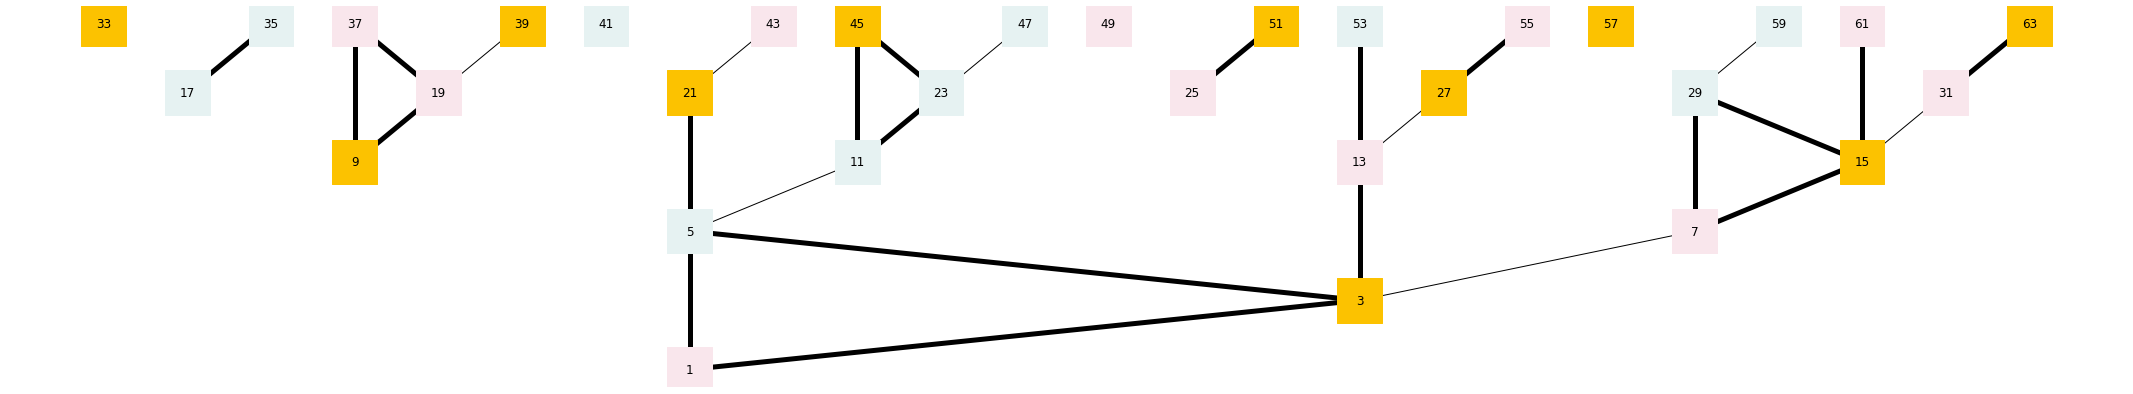

In [13]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 6) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()

aberkane_tree.genGraphData(G)



w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w*1.5
    h = h+1

plt.figure(figsize=(w, h))

plt.gca().invert_yaxis()
#nx.draw(G, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=10)
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights, node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1 ) 